# Instalação das bibliotécas

In [1]:
# Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import pandas as pd

# Biblioteca para criação de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Biblioteca para Machine Learning
from sklearn.model_selection import train_test_split # Função para dividir um conjunto de dados em conjuntos de treinamento e teste.
from sklearn.linear_model import LogisticRegression # Classe para realizar regressão logística.
from sklearn.ensemble import RandomForestClassifier  # Classe para construir um modelo de classificação usando um conjunto de árvores de decisão aleatórias.
from sklearn.ensemble import GradientBoostingClassifier # Classe para construir um modelo de classificação usando a técnica de boosting com árvores de decisão.
from sklearn.tree import DecisionTreeClassifier # Classe para construir um modelo de classificação baseado em uma árvore de decisão.
from sklearn.svm import SVC # Classe para construir um modelo de classificação ou regressão usando máquinas de vetores de suporte.
from sklearn.neighbors import KNeighborsClassifier # Classe para construir um modelo de classificação baseado no algoritmo k-vizinhos mais próximos (KNN).
from sklearn.neural_network import MLPClassifier # Classe para construir um modelo de classificação usando uma rede neural perceptron multicamada (MLP).
from sklearn.naive_bayes import MultinomialNB # Classe para construir um modelo de classificação usando o algoritmo Naive Bayes multinomial.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Função para calcular a precisão de um modelo de classificação.

# Carregar arquivo

In [3]:
pip install ucimlrepo

In [4]:
# Origem dos dados: https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice

# Baixar o repositório com os dados a serem analisados
from ucimlrepo import fetch_ucirepo

# Buscar conjunto de dados
contraceptive_method_choice = fetch_ucirepo(id=33)

# Dados (pandas dataframes)
features = contraceptive_method_choice.data.features
targets = contraceptive_method_choice.data.targets

In [5]:
# Transformar os dados divididos da base em um único dataframed
dados_metodos = pd.concat([features, targets], axis=1)

Informações adicionais

Esta base de dados contém 34 atributos, dos quais 33 são de valor linear e um deles é nominal. O diagnóstico diferencial das doenças eritematoescamosas é um verdadeiro problema na dermatologia. Todos compartilham as características clínicas de eritema e descamação, com muito poucas diferenças. As doenças deste grupo são psoríase, dermatite seborreica, líquen plano, pitiríase rósea, dermatite crônica e pitiríase rubra pilar. Normalmente é necessária uma biópsia para o diagnóstico, mas infelizmente estas doenças também partilham muitas características histopatológicas. Outra dificuldade para o diagnóstico diferencial é que uma doença pode apresentar características de outra doença no estágio inicial e pode apresentar traços característicos nos estágios seguintes. Os pacientes foram avaliados clinicamente pela primeira vez com 12 características. Posteriormente, foram coletadas amostras de pele para avaliação de 22 características histopatológicas. Os valores das características histopatológicas são determinados pela análise das amostras ao microscópio. No conjunto de dados construído para este domínio, o recurso histórico familiar tem valor 1 se alguma dessas doenças foi observada na família e 0 caso contrário. O recurso de idade representa simplesmente a idade do paciente. Todas as outras características (clínicas e histopatológicas) receberam um grau na faixa de 0 a 3. Aqui, 0 indica que a característica não estava presente, 3 indica a maior quantidade possível e 1, 2 indicam os valores intermediários relativos. Os nomes e números de identificação dos pacientes foram recentemente removidos do banco de dados.

# Análise dos dados

In [6]:
# Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado as 3 linhas iniciais.
dados_metodos.head()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [8]:
# Verificar e conta se há dados nulos em todas as colunas.
dados_metodos.isna().sum()

erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

In [10]:
# Verificar se há linhas com valores duplicados
dados_metodos.duplicated().sum()

0

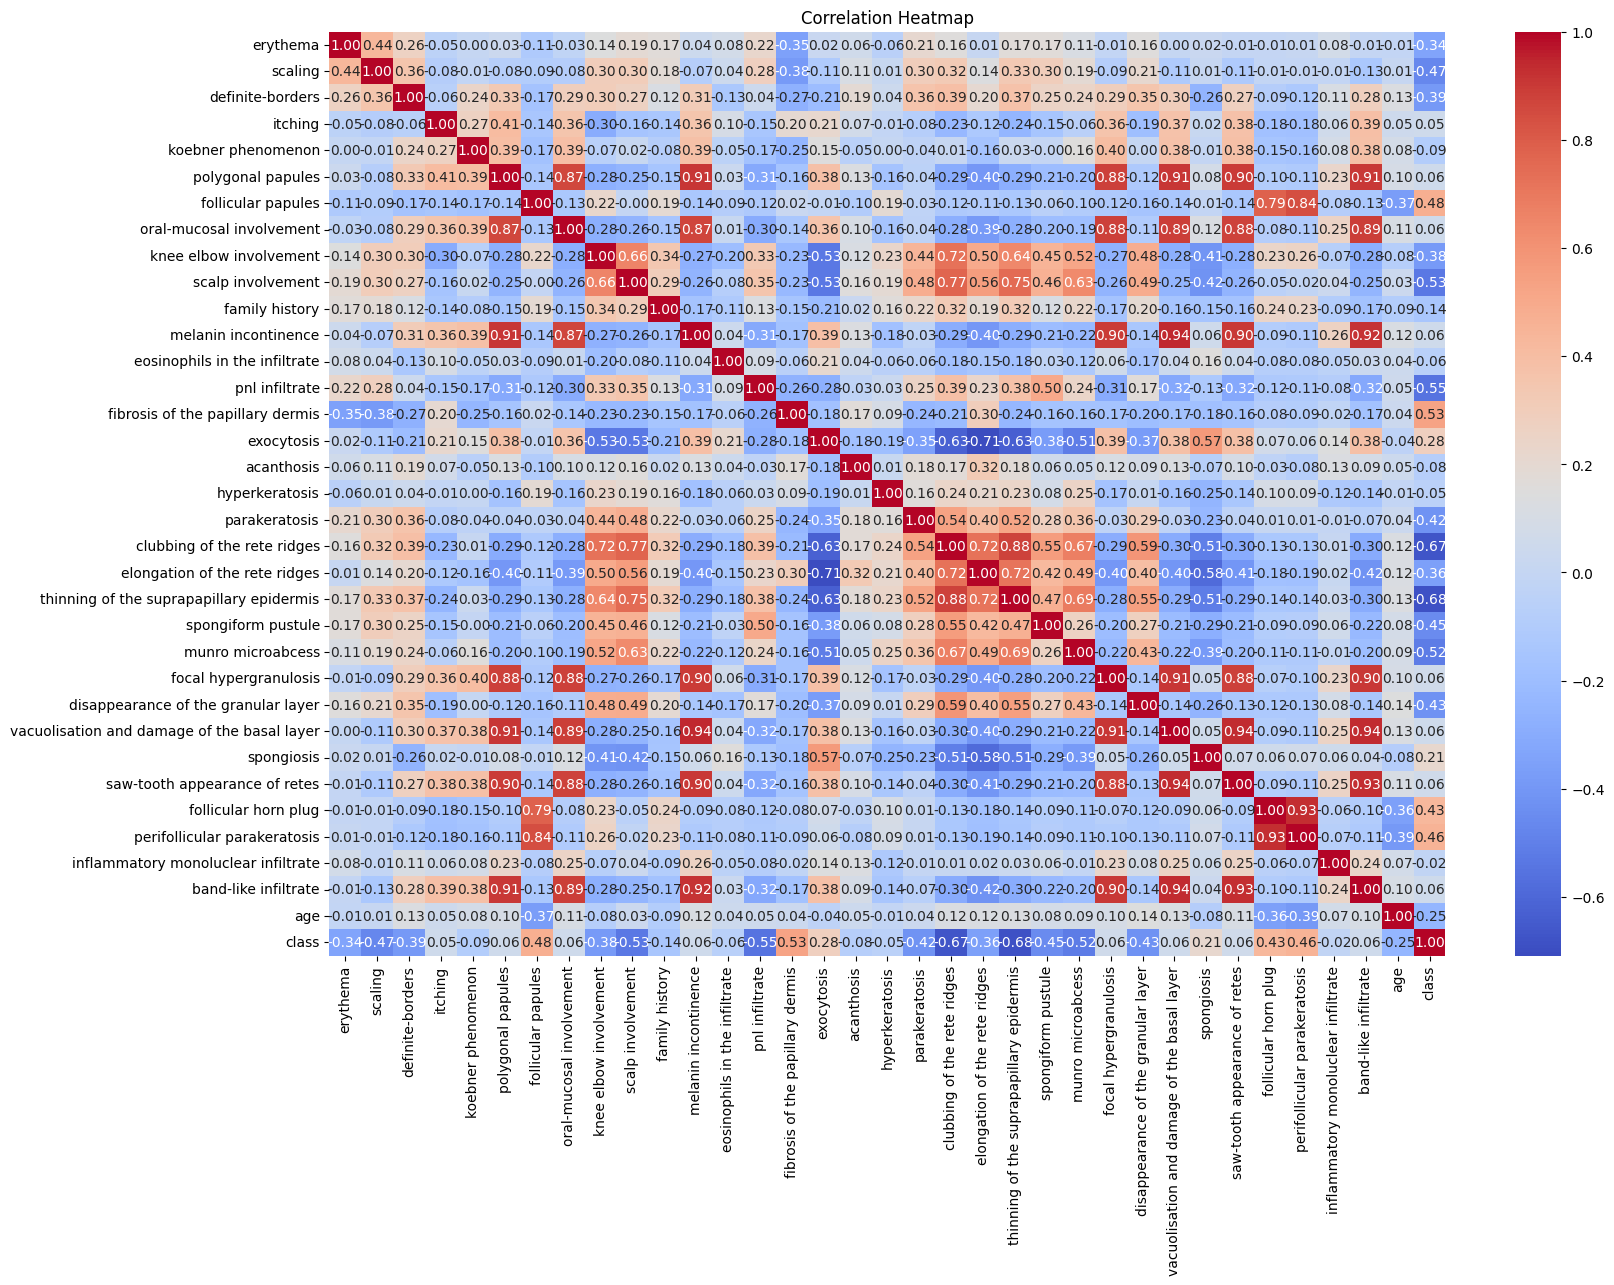

In [28]:
# Calcular a matriz de correlação
correlation_matrix = dados_metodos.corr()

# Criar o mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pré-processamento

In [9]:
# Mostra em quais linha há valores nulos na coluna 'age' - única que tem dados nulos
dados_metodos[(dados_metodos['age'].isna())]

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,NaN,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,NaN,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,NaN,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,NaN,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,NaN,5


# Modelagem e Desenvolvimento

In [11]:
# Substitui os valores nulos da coluna 'age' pela idade modal da coluna
nulos = dados_metodos['age'].mode()[0]
dados_metodos['age'] = dados_metodos['age'].fillna(nulos)

In [12]:
# Realiza separação do dados de treino e teste
X = dados_metodos.drop('class', axis=1)
y = dados_metodos['class']

In [13]:
# Realiza o treinamento e teste dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Cria função 'machine' que facilita na repetição de parte do código
def machine(nome, modelo):
  modelo.fit(X_train, y_train)
  pred = modelo.predict(X_test)
  score = accuracy_score(pred, y_test)
  print(f'{nome} {round(score*100, 2)}')
  report = classification_report(pred, y_test)
  print(report)

log = LogisticRegression()
dtr = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC(C=0.9)
knn = KNeighborsClassifier(n_neighbors=1)
red = MLPClassifier( hidden_layer_sizes=(100, 50, 20),activation='logistic')
mnb = MultinomialNB()
gbm = GradientBoostingClassifier()

lista = (log, dtr, rfc, svm, knn, red, mnb, gbm)
nomes = ('Regressão Logística', 'Árvores de Decisão', 'Random Forests', 'SVM (Support Vector Machines)', 'KNN (K-Nearest Neighbors)', 'Rede neural',
         'Multinomial Naive Bayes', 'Gradient Boosting Machines (GBM)')

In [15]:
# Testa todas a linguagens para identificar qual melhor estima o resultado
for a in range(0, 8):
  machine(nomes[a], lista[a])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regressão Logística 98.65
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        13
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

Árvores de Decisão 98.65
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        32
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00         3

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Rede neural 98.65
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        13
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

Multinomial Naive Bayes 100.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                 